In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
from cartopy.io import shapereader
import cartopy.feature as cfeature
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmaps
from cmcrameri import cm

## River Discharge

In [80]:
# import GloFAS dataset
ds = xr.open_dataset('glofas_merged2.grib', engine='cfgrib')
ds

<xarray.Dataset>
Dimensions:     (time: 15341, latitude: 41, longitude: 61)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 43.0 42.9 42.8 42.7 ... 39.3 39.2 39.1 39.0
  * longitude   (longitude) float64 285.0 285.1 285.2 ... 290.8 290.9 291.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    dis24       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-09-12T09:00 GRIB to CDM+CF via cfgrib-0.9.9...

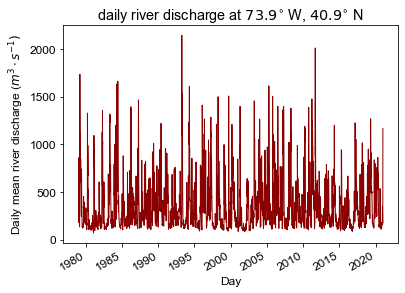

In [83]:
# time series plot
dss = ds.sel(longitude=286.1, latitude=40.9, method='nearest')
dss.dis24.plot(color='darkred',linewidth=1)
mpl.rcParams['font.size'] = 12
plt.title('daily river discharge at $73.9^{\circ}$ W, $40.9^{\circ}$ N')
plt.xlabel('Day')
plt.ylabel('Daily mean river discharge ($m^3 \cdot s^{-1})$')
plt.savefig('dis_ts.svg', format='svg', transparent=False, dpi=600, bbox_inches='tight')

In [3]:
# select one day for output visualization
%time ds1 = ds.sel(time=slice("2020-05-15", "2020-05-15"))

Wall time: 26 ms


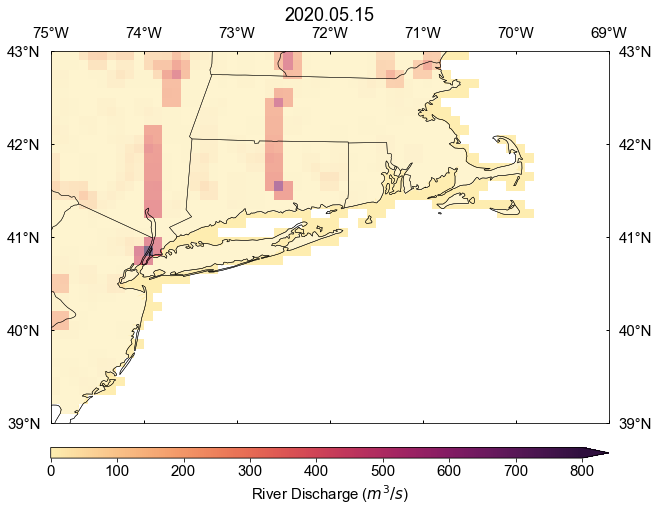

In [19]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10, 15),
                           subplot_kw=dict(projection=projection))
    #gl = ax.gridlines(draw_labels=True, linestyle='--',linewidth=0.5,alpha=0.)
    #gl.xlabels_bottom = False
    #gl.xlocator = mticker.FixedLocator([-75, -74, -73, -72, -71, -70, -69])
    #gl.ylocator = mticker.FixedLocator([39, 40, 41, 42, 43])
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([-75, -69, 39, 43])

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 15

shp = shapereader.Reader('C:/Users/panmits86/Desktop/Python/SNE_shapefile/GSHHS_i_L1_SNE1.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='white',alpha=0.4)
    

ax.coastlines(resolution='10m',linewidth=0.5)
ax.add_feature(cfeature.STATES.with_scale('10m'),linewidth=0.5,alpha=0.8)


def custom_div_cmap(numcolors=20, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap   
    
    
cmap = cmaps.cmocean_matter

lon, lat= np.meshgrid(ds1['longitude'],ds1['latitude'])

cs2 = plt.pcolormesh(lon+0.05, lat+0.05, ds1['dis24'][0,:,:],vmin=0., vmax=800., cmap=cmap)

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.03,aspect=50)

out=fig.colorbar(cs2,cax=cax,ticks=ticks,extend='max',**kw)
out.set_label('River Discharge ($m^{3}/s$)')
ax.set_title('2020.05.15')

ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

lon_ticks = [-75, -74, -73, -72, -71, -70, -69]
lat_ticks = [39, 40, 41, 42, 43]

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax.xaxis.set_tick_params(which='major', size=3, width=1, direction='in', top='on', pad=10.)
ax.yaxis.set_tick_params(which='major', size=3, width=1, direction='in', right='on',pad=10.)

ax.tick_params(labelright=True,labelbottom=False,labeltop=True)

plt.savefig('river_discharge.svg', format='svg', transparent=False, dpi=600, bbox_inches='tight')

## Precipitation

In [68]:
# import the saved NetCDF file
ds3 = xr.open_dataset('mswep_sne.nc')
ds3

<xarray.Dataset>
Dimensions:        (time: 15339, lat: 40, lon: 60)
Coordinates:
  * lon            (lon) float32 -74.95 -74.85 -74.75 ... -69.25 -69.15 -69.05
  * lat            (lat) float32 42.95 42.85 42.75 42.65 ... 39.25 39.15 39.05
  * time           (time) datetime64[ns] 1979-01-02 1979-01-03 ... 2020-12-30
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes:
    history:  Created on 2021-02-03 20:47

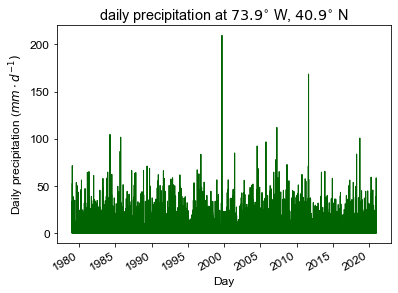

In [84]:
# precipitation time series 
dss = ds3.sel(lon=-73.9, lat=40.9, method='nearest')
dss.precipitation.plot(color='darkgreen',linewidth=1)
mpl.rcParams['font.size'] = 12
plt.title('daily precipitation at $73.9^{\circ}$ W, $40.9^{\circ}$ N')
plt.xlabel('Day')
plt.ylabel('Daily precipitation ($mm \cdot d^{-1})$')
plt.savefig('prec_ts.svg', format='svg', transparent=False, dpi=600, bbox_inches='tight')

In [65]:
%time ds4 = ds3.sel(time=slice("2020-05-15", "2020-05-15"))

Wall time: 48.6 ms


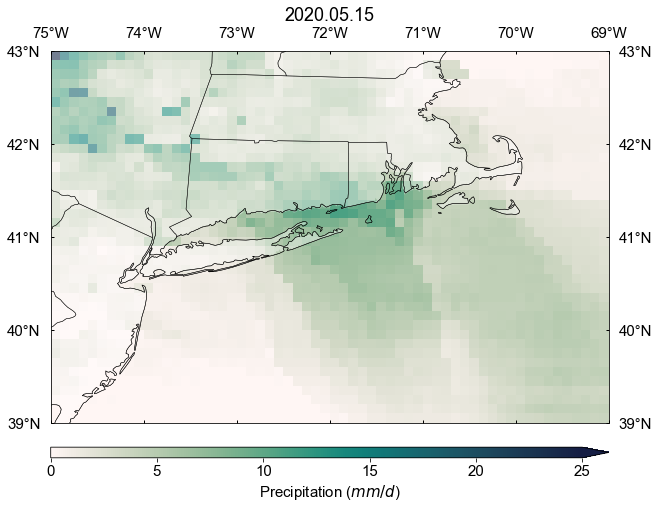

In [67]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10, 15),
                           subplot_kw=dict(projection=projection))
    #gl = ax.gridlines(draw_labels=True, linestyle='--',linewidth=0.5,alpha=0.)
    #gl.xlabels_bottom = False
    #gl.xlocator = mticker.FixedLocator([-75, -74, -73, -72, -71, -70, -69])
    #gl.ylocator = mticker.FixedLocator([39, 40, 41, 42, 43])
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([-75, -69, 39, 43])

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 15

shp = shapereader.Reader('C:/Users/panmits86/Desktop/Python/SNE_shapefile/GSHHS_i_L1_SNE1.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='white',alpha=0.4)
    

ax.coastlines(resolution='10m',linewidth=0.5)
ax.add_feature(cfeature.STATES.with_scale('10m'),linewidth=0.5,alpha=0.8)


#cmap=cmaps.WhiteBlue
cmap=cmaps.cmocean_tempo
#cmap = cm.bilbao
#bounds = np.array([0.,0.5,1.,1.5,2.,2.5,3])
#bounds = np.arange(0,5,0.5)
#norm = colors.BoundaryNorm(boundaries=bounds, ncolors=10)
norm = mpl.colors.Normalize(vmin=0., vmax=25)

lon, lat= np.meshgrid(ds4['lon'],ds4['lat'])
cs2 = plt.pcolormesh(lon, lat, ds4['precipitation'][0,:,:], cmap=cmap,norm=norm)

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.03,aspect=50)

out=fig.colorbar(cs2,cax=cax,extend='max',**kw)
out.set_label('Precipitation ($mm/d$)')
ax.set_title('2020.05.15')

ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

lon_ticks = [-75, -74, -73, -72, -71, -70, -69]
lat_ticks = [39, 40, 41, 42, 43]

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax.xaxis.set_tick_params(which='major', size=3, width=1, direction='in', top='on', pad=10.)
ax.yaxis.set_tick_params(which='major', size=3, width=1, direction='in', right='on',pad=10.)

ax.tick_params(labelright=True,labelbottom=False,labeltop=True)


#plt.savefig('precipitation.svg', format='svg', transparent=False, dpi=600, bbox_inches='tight')